In [35]:
import ROOT
from ROOT import RDataFrame, TCanvas

rdf = RDataFrame('h22', 'data/raw/lvl2_eppi0.inb.mc.root')
vals = 'mm2,epX,p_factor'
rdf = rdf.Define('vals', '''
TLorentzVector beam, targ, e, p, p0, g1, g2;

beam.SetXYZT(0,0,10.6041,10.6041);
targ.SetXYZT(0,0,0,0.938272081);

e.SetXYZM(ex,ey,ez,0.000510999);
p.SetXYZM(px,py,pz,0.938272081);

g1.SetXYZM(g1x,g1y,g1z,0.1349768);
g2.SetXYZM(g2x,g2y,g2z,0.1349768);

p0.SetXYZM(px0,py0,pz0,0.938272081);

auto p_factor = p0.P() / p.P();

double epX = (beam+targ-e-p0).M2(), mm2 = (beam+targ-e-p0-g1).M2();
return vector<double>{'''+vals+'};')

for i,v in enumerate(vals.split(',')):
  rdf = rdf.Define(v,f'vals[{i}]')


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


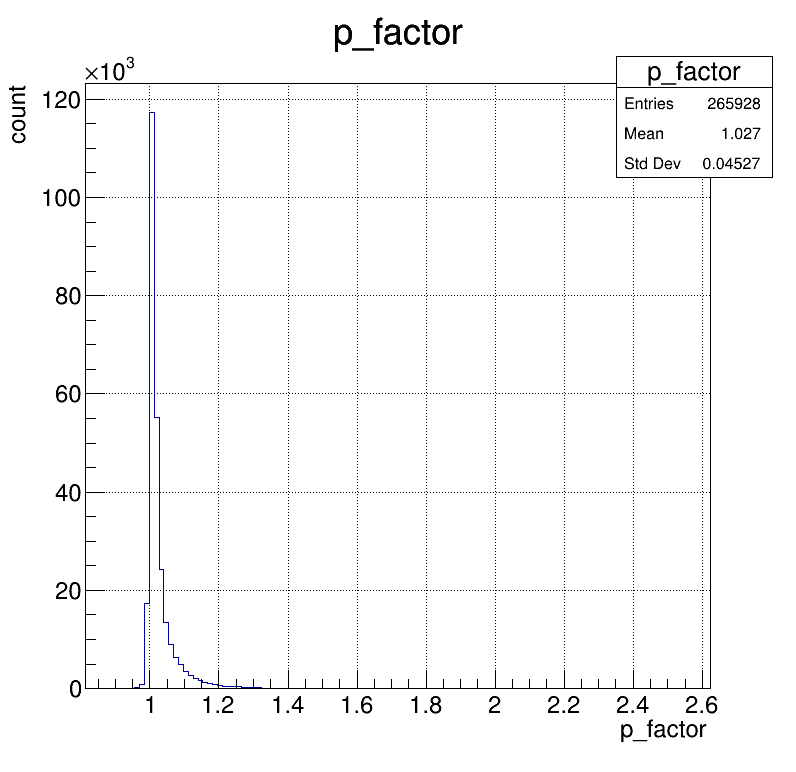

In [36]:
c1 = TCanvas('c1','c1',800,800); c1.Divide(1,1); c1.Draw()
c1.cd(1).SetGrid()

h1 = rdf.Histo1D('p_factor')
h1.Draw()
# #g1 : -0.001129, 0.02388
# #g2 : -0.07171, 0.1081
# h2 = rdf.Histo1D('epX')
# h2.SetLineColor(ROOT.kRed)
# h2.Draw('same')